In [15]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('../scripts'))

# Import necessary libraries
import pandas as pd
from data_processing import clean_data, feature_engineering
from visualizations import plot_sales_distribution, plot_promo_effect, plot_store_type_sales, plot_competition_effect


In the below work I tried to Configure the logging to capture the tasks

C:\Users\25192.PS\AppData\Local\Temp\ipykernel_10924\2019910365.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/rossmann-store-sales/train.csv')


Training data overview:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31/07/2015   5263        555     1      1            0   
1      2          5  31/07/2015   6064        625     1      1            0   
2      3          5  31/07/2015   8314        821     1      1            0   
3      4          5  31/07/2015  13995       1498     1      1            0   
4      5          5  31/07/2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Store data overview:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c            

e:\EDUCATION\Kifiya_AI_Mastery_Program\week-4\scripts\data_processing.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['CompetitionDistance'].fillna(merged_data['CompetitionDistance'].median(), inplace=True)
e:\EDUCATION\Kifiya_AI_Mastery_Program\week-4\scripts\data_processing.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob


Cleaned training data (head):
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceYear  Promo2  \
0              1         c  ...                   2008.0       0   
1              1         a  ...                   2007.0       1   
2              1         a  ...                   2006.0       1   
3              1         c  ...                   2009.0       0   
4              1         a  ...                   2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval     Holiday  Year Month  \
0          

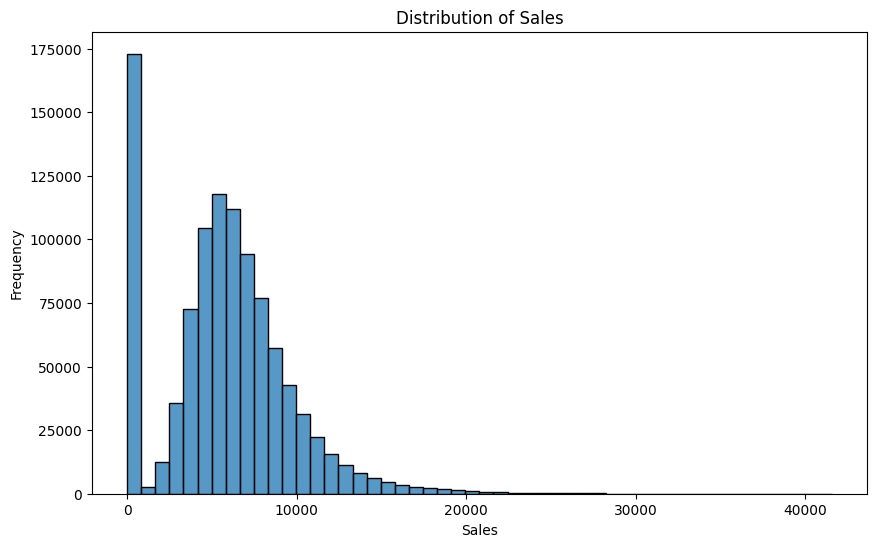


Plotting promo effect on sales...


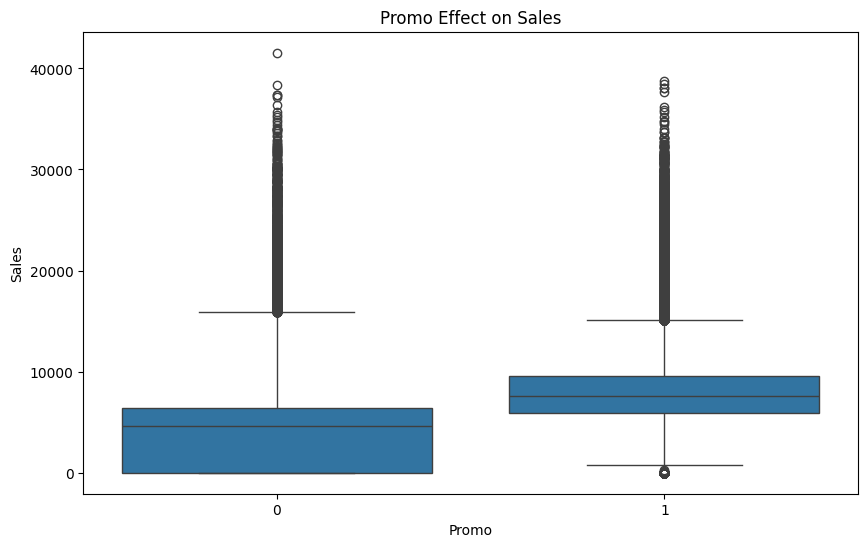


Plotting store type and sales distribution...


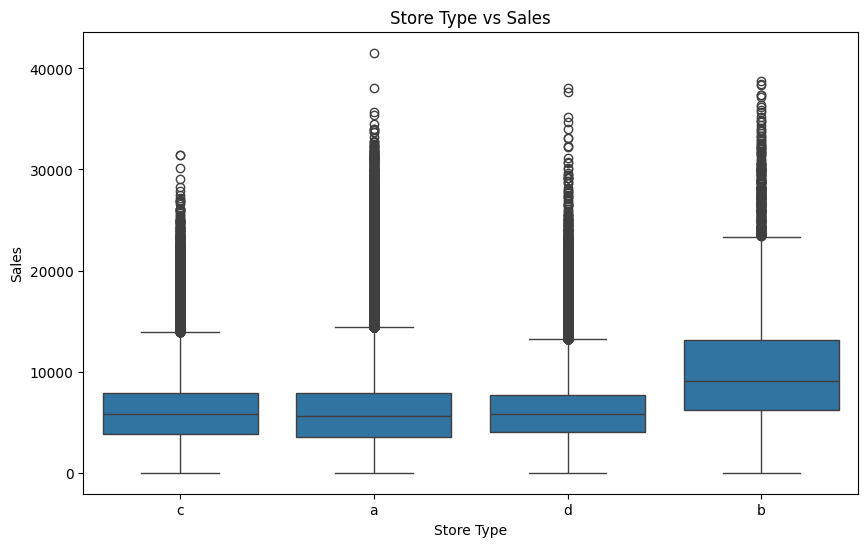


Plotting competition effect on sales...


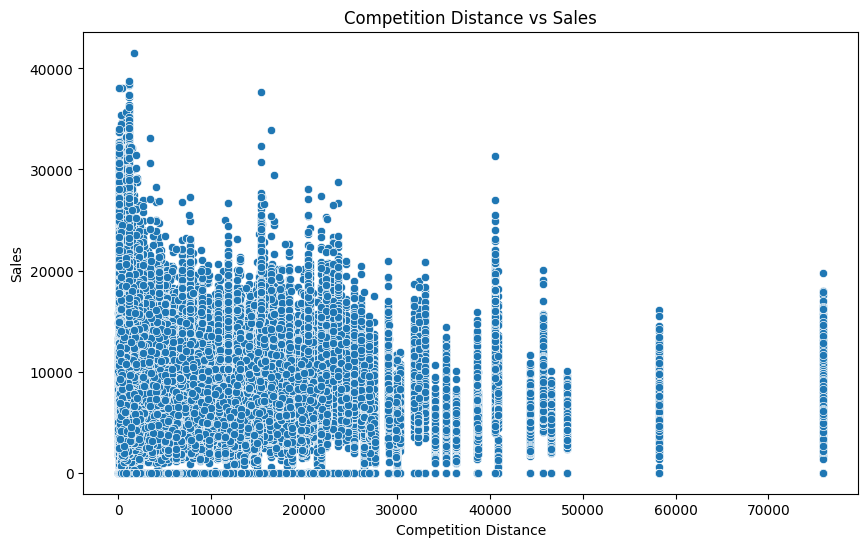

In [19]:
import pandas as pd
import logging

# Step 1: Configure the logging
logging.basicConfig(level=logging.INFO, 
                    filename='exploratory_analysis.log', 
                    filemode='a',  # Append to the log file
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Starting exploratory data analysis.')

# Step 2: Load the data
try:
    train_data = pd.read_csv('../data/rossmann-store-sales/train.csv')
    store_data = pd.read_csv('../data/rossmann-store-sales/store.csv')
    test_data = pd.read_csv('../data/rossmann-store-sales/test.csv')
    logging.info('Data loaded successfully.')
except Exception as e:
    logging.error(f'Error loading data: {e}')

 # Initial Data Overview
try:
    print("Training data overview:")
    print(train.head())  # Replaced 'display' with 'print' to work in Jupyter or script environments
    print("\nStore data overview:")
    print(store.head())  # Same here for printing
    logging.info('Initial Data Overview.')
except Exception as e:
    logging.error(f'Error Initial Data Overview: {e}')

# Step 3: Check for missing values
try:
    missing_train = train_data.isnull().sum()
    logging.info(f'Missing values in training data: {missing_train[missing_train > 0]}')
except Exception as e:
    logging.error(f'Error checking missing values: {e}')

# Step 4: Data cleaning
try:
    # Clean the data (Missing values, outliers)
    train_cleaned = clean_data(train, store)

    # Verify cleaning steps
    print("\nCleaned training data (head):")
    print(train_cleaned.head())
    print("\nRemaining missing values after cleaning:")
    print(train_cleaned.isnull().sum())
    # Example of handling missing values
    #train_data.fillna(method='ffill', inplace=True)
    logging.info('Missing values handled.')
except Exception as e:
    logging.error(f'Error handling missing values: {e}')

# Step 5:Feature Engineering
try:    
    # Feature Engineering (Promo, Holidays, etc.)
    train_fe = feature_engineering(train_cleaned)

    # Verify feature engineering steps
    print("\nTraining data after feature engineering (head):")
    print(train_fe.head())
    logging.info('Feature Engineering is done.')
except Exception as e:
    logging.error(f'Error on Feature Engineering: {e}')    

# Step 6: Exploratory Data Analysis and logging

try:
    # Visualization: Sales distribution
    print("\nPlotting sales distribution...")
    plot_sales_distribution(train_fe)
    logging.info('Sales distribution plot created.')
except Exception as e:
    logging.error(f'Error creating sales distribution plot: {e}')

try:
    # Visualization: Promo effect on sales
    print("\nPlotting promo effect on sales...")
    plot_promo_effect(train_fe)
    logging.info('promo effect on sales plot created.')
except Exception as e:
    logging.error(f'Error creating promo effect on sales plot: {e}')

try:
    # Visualization: Store Type and Sales
    print("\nPlotting store type and sales distribution...")
    plot_store_type_sales(train_fe)
    logging.info('Store Type and Sales plot created.')
except Exception as e:
    logging.error(f'Error creating Store Type and Sales plot: {e}')

try:
    # Visualization: Competition Effect on Sales
    print("\nPlotting competition effect on sales...")
    plot_competition_effect(train_fe)
    logging.info('Competition Effect on Sales plot created.')
except Exception as e:
    logging.error(f'Error creating Competition Effect on Sales plot: {e}')


# Final log entry
logging.info('Exploratory data analysis completed.')
